# Logistic regression for one input

In [1]:
# Import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# import Dataset
dataset=pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Age_vs_Ai_Purchase.xlsx")
dataset.head(3)

,Age,Ai_Model_Purchase
0,48,0
1,27,0
2,80,0


<Axes: xlabel='Age ', ylabel='Ai_Model_Purchase'>

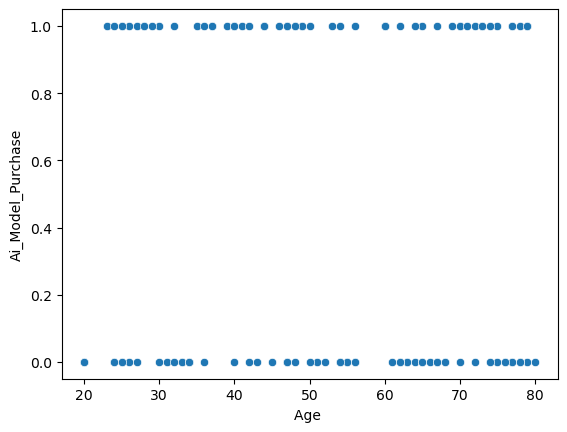

In [19]:
sns.scatterplot(x="Age ",y="Ai_Model_Purchase",data=dataset)

In [21]:
# This graph looks like we have to apply logistic regression here 

In [23]:
# Split The dataset in x_input and y_input 
x=dataset[["Age "]]
y=dataset["Ai_Model_Purchase"]

In [25]:
# Split the dataset into train and test data 
from sklearn.model_selection import train_test_split


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
# Import library for logistic regression 
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
lr.score(x_test,y_test)*100

41.66666666666667

In [107]:
y_pred = lr.predict(x)

<Axes: xlabel='Age ', ylabel='Ai_Model_Purchase'>

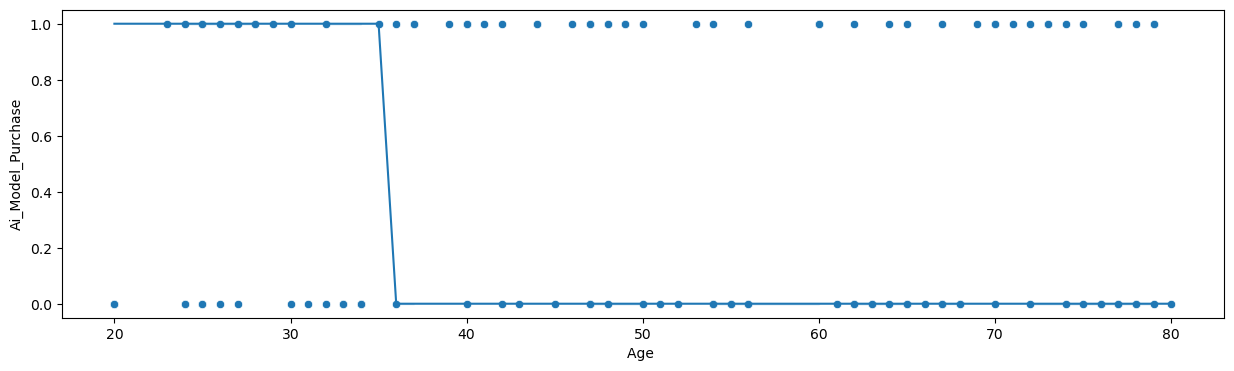

In [111]:
# Now check how sigmoid graph looks like 
plt.figure(figsize=(15,4))
sns.scatterplot(x="Age ",y="Ai_Model_Purchase",data=dataset)
sns.lineplot(x=dataset["Age "],y=lr.predict(x))
# plt.plot(lr.predict(x))


In [119]:
lr.predict([[40]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [87]:
lr.predict(x).flatten()

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Lasso 

In [121]:
# If i apply Lasso To increase the accuracy then  what happen lets se 
from sklearn.linear_model import Lasso

In [153]:
la=Lasso(alpha=0.01)

In [155]:
la.fit(x_train,y_train)

Lasso(alpha=0.01)

In [157]:
la.score(x_test,y_test)*100

-0.3545991286625805

# Ridge

In [161]:
from sklearn.linear_model import Ridge

In [163]:
ri=Ridge(alpha=1)

In [165]:
ri.fit(x_train,y_train)

Ridge(alpha=1)

In [169]:
ri.score(x_test,y_test)*100

-0.35493072764802847

<Axes: xlabel='Age ', ylabel='Ai_Model_Purchase'>

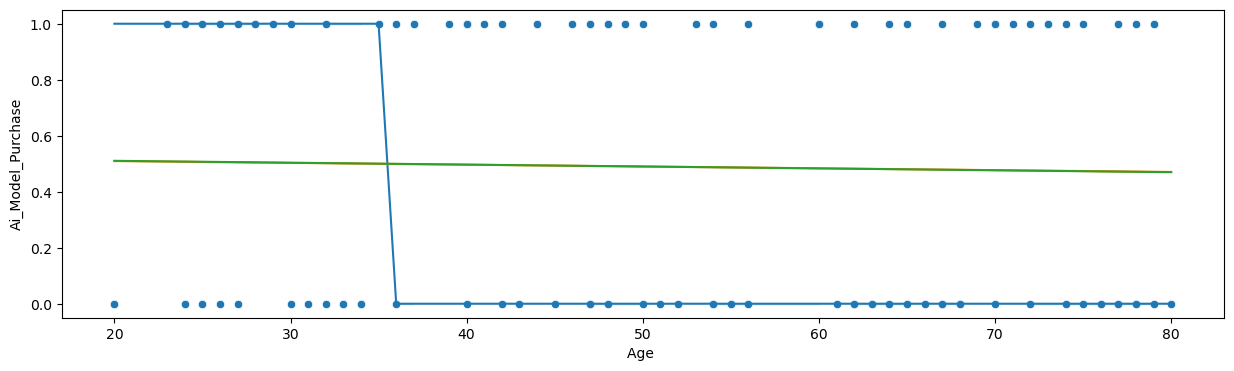

In [175]:
plt.figure(figsize=(15,4))
sns.scatterplot(x="Age ",y="Ai_Model_Purchase",data=dataset)
sns.lineplot(x=dataset["Age "],y=lr.predict(x))
sns.lineplot(x=dataset["Age "],y=la.predict(x))
sns.lineplot(x=dataset["Age "],y=ri.predict(x))

# Standard scalar :- Isse kuch jyada fark pad nhi raha 

In [177]:
# Someone said that apply standard scalar before applying Lasso directly to the dataset
from sklearn.preprocessing import StandardScaler

In [179]:
sa=StandardScaler()


In [189]:
df1=pd.DataFrame(sa.fit_transform(x),columns=["Scale_Age"])

In [197]:
df1.head()

,Scale_Age,Ai_Purchase
0,-0.198607,0
1,-1.370386,0
2,1.586962,0
3,-1.481984,1
4,-0.979793,0


In [195]:
df1["Ai_Purchase"]=dataset["Ai_Model_Purchase"]

In [199]:
# Now Break the dataset into train and test for lasso 

In [207]:
x_t1,x_t2,y_t1,y_t2=train_test_split(df1[["Scale_Age"]],df1["Ai_Purchase"],test_size=0.20,random_state=42)
# T1 = Train and T2 is for test 

In [225]:
la=Lasso(alpha=0.0010)

In [227]:
la.fit(x_t1,y_t1)

Lasso(alpha=0.001)

In [229]:
la.score(x_t2,y_t2)

-0.0035444682596756927